<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/jds.png" style="height: 100px;" align=right> 

# JDS Capstone: Target Market Analysis

You have been provided with information about the customers' historical purchase as the amount of money spent, Number of inactive months and so on. Two columns `Potential_Customer` and `Cust_Last_Purchase` represent the customers' respond to the latest advertisement. The column `Potential_Customer` represents if the customer purchased any product, and the column `Cust_Last_Purchase` represents the amount of this purchase and it is `Nan` if there has been no purchase.

## Data description
- Below is the description of each feature available in the dataset.
<img src="../images/MicrosoftTeams-image.png" style="height: 700px">

## Objective
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

**3. Compare your best model's revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10\%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

## Submission Guideline

Perform the following:

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics
    3. **Feature Engineering**: Make new features or change the current features
    4. **Feature Selection**: Choose the best features
    5. **Data Pre-Processing**: Make data usable for applying ML algorithms. 
    6. **Model Design**: Create several predictive models and tune the hyperparameters
    7. **Model Evaluation**: Compare the performance of the models
    8. **Bonus**: Any creative idea for improving machine learning models

The output expected at the end of this capstone is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class. 

**One zip file per group** is to be uploaded on **GDrive** by the **time** that will be given to you by the trainer, including the **jupyter notebook(s)** and the **powerpoint presentation** indicating the **names of all group members**.

## Presentation Guideline

**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

# Table of Content

- [JDS Capstone: Target Market Analysis](#JDS-Capstone:-Target-Market-Analysis)
- [Data description](#Data-description)
- [Objective](#Objective)
- [Submission Guideline](#Submission-Guideline)
- [Presentation Guideline](#Presentation-Guideline)
- [Table of Content](#Table-of-Content)
- [0. Import necessary Packages](#0.-Import-necessary-Packages)
- [1. Load the Data into Pandas Dataframe](#1.-Load-the-Data-into-Pandas-Dataframe)
- [2. Data Cleaning](#2.-Data-Cleaning)
    - [2.1 How big is the dataset? (number of rows, features and total datapoints)](#2.1-How-big-is-the-dataset?-(number-of-rows,-features-and-total-datapoints))
    - [2.2 What is the type of each column?](#2.2-What-is-the-type-of-each-column?)
        - [2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.](#2.2.1-Why-columns-such-as-`Cust_Last_Purchase`-are-`object`-while-they-should-be-`float64`?-Fix-the-type-of-the-columns-as-it-should-be.)
    - [2.3 Check data for duplicate rows and remove the duplicates](#2.3-Check-data-for-duplicate-rows-and-remove-the-duplicates)
    - [2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.](#2.4-Do-we-need-`C_ID`-in-our-analysis?-Drop-the-columns-you-will-not-use-in-your-analysis,-if-there-is-any.)
- [3. Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))
    - [3.1 Explore Categorical Variables](#3.2-Explore-Categorical-Variables)
        - [3.1.1 Insight](#3.1.1-Insight)
        - [3.1.2 Solution](#3.1.2-Solution)
    - [3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation](#3.2-Explore-Relationship-Between-Categorical-&-Target-Variable.-Interpret-the-observation)
        - [3.2.1. Insight](#3.2.1.-Insight)
    - [3.3 Explore Numerical Variables](#3.3-Explore-Numerical-Variables)
        - [3.3.1 Insight](#3.3.1-Insight)
    - [3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation](#3.4-Explore-the-Relationship-between-Numerical-Variables-&-Target-Variable.-Interpret-your-observation)
    - [3.5 Explore the Relationship between the columns and try to answer the following questions:](#3.5-Explore-the-Relationship-between-the-columns-and-try-to-answer-the-following-questions:)
- [4. Feature Enginearing](#4.-Feature-Enginearing)
    - [4.1 Add Some High Level Features and explore their relationship with the target variable](#4.1-Add-Some-High-Level-Features-and-explore-their-relationship-with-the-target-variable)
    - [4.2 Check Correlation between Numerical Variables](#4.2-Check-Correlation-between-Numerical-Variables)
- [5. Feature Selection](#5.-Feature-Selection)
- [6. Data PreProcessing](#6.-Data-PreProcessing)
    - [6.1 Check the Data for Missing Values](#6.1-Check-the-Data-for-Missing-Values)
    - [6.2 Separate X (features) and y (target)](#6.2-Separate-X-(features)-and-y-(target))
    - [6.3 Split data to train/test](#6.3-Split-data-to-train/test)
    - [6.4 Dummy Variables](#6.4-Dummy-Variables)
    - [6.5 Feature Scaling](#6.5-Feature-Scaling)
    - [6.6 PCA on Numerical Columns only](#6.6-PCA-on-Numerical-Columns-only)
- [7. Objective 1: Machine Learning](#7.-Objective-1:-Machine-Learning)
- [8. Objective 2](#8.-Objective-2)
- [9. Objective 3](#9.-Objective-3)
- [10. Objective 4](#10.-Objective-4)

#   0. Import necessary Packages

In [2]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#  1. Load the Data into Pandas Dataframe

In [3]:
# Load the data into data dataframe
data = pd.read_csv('../data.csv')

In [4]:
# View first 5 rows of dataframe
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [5]:
# View your data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


# 2. Data Cleaning
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 How big is the dataset? (number of rows, features and total datapoints)

In [6]:
#learn how to format and get the values
print('The data consists of \nRows: {} \nFeatures: {} and \nTotal datapoints: {}'.format(data.shape[0], data.shape[1],data.size))

The data consists of 
Rows: 4469 
Features: 25 and 
Total datapoints: 111725


## 2.2 What is the type of each column?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.

**Attention:** Some numerical columns have missing values, Dollar sign, or Comma. You need to fix the issue to be able to convert the column to numerical. 

**Hint:** 
1. The following code can help you to remove an 'OldSign' and replace it with a 'NewSign' or nothing: `df.col=df.col.str.replace('OldSign', 'NewSign')`

2. After removing the signs and replace it with correct sign, or nothing you need to:

    a- Create a list of the name of the categorical columns and the numerical columns:
        `CatCols=[Name of the Categorical columns]`
        `NumCols=list(set(data.columns)-set(CatCols))`
    
    b- Fix the type of the columns
        `data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))`
        `data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))`

In [8]:
#1. data.col =data.col.str.replace('OldSign', 'NewSign')
# replace '$',',' with ''?
#fix missing values? 

PriceCol = ['Cust_Last_Purchase','Pur_latest','Pur_3_years_Avg', 'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect', 'Cust_Ann_Income']

for col in PriceCol:
    data[col] =data[col].str.replace('$', '')
    data[col] =data[col].str.replace(',', '')
    
data.head(5).T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,5.00,30.00,NaN,20.00,5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,0.00,25.00,15.00,20.00,3.00
Pur_3_years_Avg,7.50,25.00,15.00,20.00,4.33
Pur_5_years_Avg,7.76,13.00,11.25,12.45,3.80


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

In [10]:
#2. list of columns
CatCols=['Potential_Customer','C_ID','Status_Cust','Status_Latest_Ad','Gender','Cust_Prop']
NumCols=list(set(data.columns)-set(CatCols))

In [11]:
#3. Fix type of columns
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        4469 non-null   category
 1   C_ID                      4469 non-null   category
 2   Cust_Last_Purchase        2149 non-null   float64 
 3   Pur_3_years               4469 non-null   float64 
 4   Pur_5_years               4469 non-null   float64 
 5   Pur_3_years_Indirect      4469 non-null   float64 
 6   Pur_5_years_Indirect      4469 non-null   float64 
 7   Pur_latest                4469 non-null   float64 
 8   Pur_3_years_Avg           4469 non-null   float64 
 9   Pur_5_years_Avg           4469 non-null   float64 
 10  Pur_3_years_Avg_Indirect  3642 non-null   float64 
 11  InAct_Last                4469 non-null   float64 
 12  InAct_First               4469 non-null   float64 
 13  Ad_Res_1_year             4469 non-null   float6

## 2.3 Check data for duplicate rows and remove the duplicates

**Hint:**

1. `data.duplicated()` will give you `True` if the row in `data` is duplicate and `False` otherwise.

2. `duplicates.sum()` will tell you how many duplicates you have in `data`.

3. `data=data.drop_duplicates()` will remove the duplicates

In [13]:
duplicates = data.duplicated()

In [14]:
duplicates.sum()

851

In [15]:
data=data.drop_duplicates()

In [16]:
#to check if duplicates were removed successfully
duplicates_check = data.duplicated()
duplicates_check.sum()

0

## 2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.

**Hint:** 
1. Drop the useless column(s)
2. Remove the name of the column(s) from `CatCols` or `NumCols`
    Example: CatCols.remove('C_ID')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   category
 1   C_ID                      3618 non-null   category
 2   Cust_Last_Purchase        1736 non-null   float64 
 3   Pur_3_years               3618 non-null   float64 
 4   Pur_5_years               3618 non-null   float64 
 5   Pur_3_years_Indirect      3618 non-null   float64 
 6   Pur_5_years_Indirect      3618 non-null   float64 
 7   Pur_latest                3618 non-null   float64 
 8   Pur_3_years_Avg           3618 non-null   float64 
 9   Pur_5_years_Avg           3618 non-null   float64 
 10  Pur_3_years_Avg_Indirect  2956 non-null   float64 
 11  InAct_Last                3618 non-null   float64 
 12  InAct_First               3618 non-null   float64 
 13  Ad_Res_1_year             3618 non-null   float6

In [18]:
data.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,...,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,...,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,0,88003,NaN,5.0,12.0,3.0,5.0,15.0,15.00,11.25,...,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,...,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,...,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0


In [19]:
#1. Useless columns: C_ID, Cust_Last_Purchase
data_new = data.drop(columns=['C_ID','Cust_Last_Purchase'])
data_new.head()

,Potential_Customer,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14.0,...,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,1,1.0,7.0,0.0,3.0,25.0,25.00,13.00,NaN,18.0,...,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19.0,...,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,1,1.0,11.0,0.0,3.0,20.0,20.00,12.45,NaN,5.0,...,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,1,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17.0,...,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0


In [20]:
#2. Remove dropped 
CatCols.remove('C_ID')
CatCols

['Potential_Customer',
 'Status_Cust',
 'Status_Latest_Ad',
 'Gender',
 'Cust_Prop']

In [21]:
NumCols.remove('Cust_Last_Purchase')
NumCols

['Pur_3_years_Avg_Indirect',
 'Pur_5_years_Avg',
 'InAct_Last',
 'Pur_latest',
 'InAct_First',
 'Cust_Ann_Income',
 'Ad_Res_3_Year',
 'Pur_3_years_Indirect',
 'Pur_5_years_Indirect',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_Ind_1_Year',
 'Age',
 'Pur_3_years',
 'Pur_5_years',
 'Ad_Res_1_year',
 'Ad_Res_5_Year',
 'Ad_Res_Ind_3_Year',
 'Pur_3_years_Avg']

# 3. Exploratory Data Analysis (EDA)
    
Checking the relationship between variables, summary of data, outliers, filling missing values etc.
**If the ultimate goal is designing predictive models on the data, and we use EDA as part of the proprocessing, we are NOT allowed to do EDA on the test set.** However, if you only do EDA to get business insight from the data, you **CAN** use the whole data, if you don't use that insight for data preprocessing such as data cleaning.
    
**Example:** To impute the missing values by mean/median, we calculate the mean or the median on the Train set only and then we impute the missing values by that mean/median on both Train and Test data.

In [22]:
 data['Status_Cust'].value_counts()

A    2146
S     964
F     219
N     207
E      72
L      10
Name: Status_Cust, dtype: int64

## 3.1 Explore Categorical Variables
1. How many categories in each categorical variables?
2. What proportion/percentage from each category?

**Hint:**
For visualization you can use `sns.countplot()` for each categorical variable


Column : Potential_Customer


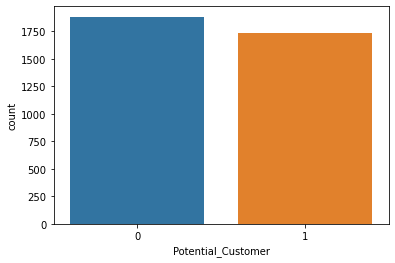

[1, 0]
Categories (2, int64): [1, 0]

Percentage for each Catagory (%):
0    52.0
1    48.0
Name: Potential_Customer, dtype: float64


Column : Status_Cust


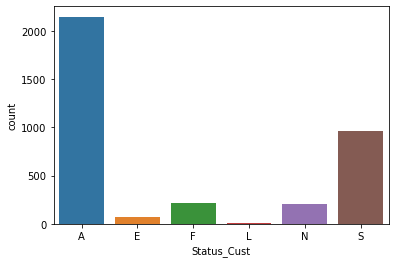

['A', 'S', 'E', 'F', 'N', 'L']
Categories (6, object): ['A', 'S', 'E', 'F', 'N', 'L']

Percentage for each Catagory (%):
A    59.3
S    26.6
F     6.1
N     5.7
E     2.0
L     0.3
Name: Status_Cust, dtype: float64


Column : Status_Latest_Ad


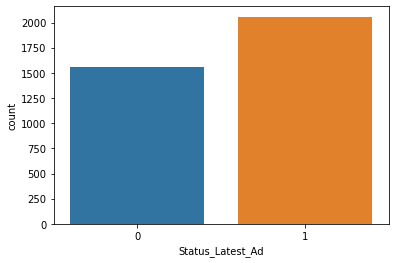

[0, 1]
Categories (2, int64): [0, 1]

Percentage for each Catagory (%):
1    56.9
0    43.1
Name: Status_Latest_Ad, dtype: float64


Column : Gender


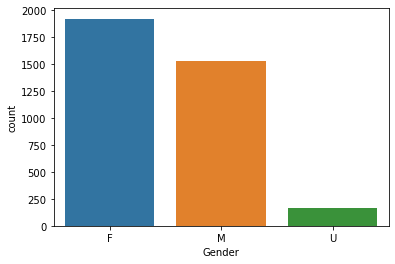

['F', 'M', 'U']
Categories (3, object): ['F', 'M', 'U']

Percentage for each Catagory (%):
F    53.1
M    42.3
U     4.6
Name: Gender, dtype: float64


Column : Cust_Prop


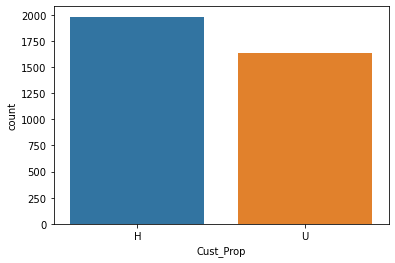

['H', 'U']
Categories (2, object): ['H', 'U']

Percentage for each Catagory (%):
H    54.8
U    45.2
Name: Cust_Prop, dtype: float64




In [89]:
for col in CatCols:
    print('Column : {}'.format(col))
    sns.countplot(x=col, data=data)
    plt.show()
    print(data[col].unique())
    print('\nPercentage for each Catagory (%):')
    print(round(data[col].value_counts(normalize = True),3)*100)
    print('\n')

In [23]:
age.median


NameError: name 'age' is not defined

### 3.1.1 Insight

### 3.1.2 Solution

## 3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation

**Hint**: 
1. Create list of the categorical features:
    `CatFes=list(set(CatCols)-set(['Potential_Customer']))`

2. use `sns.countplot()` to create subplots for each categorical feature and hue=`data.Potential_Customer` to assign color to the plot based on the target variable `Potential_Customer`

In [90]:
CatFes=list(set(CatCols)-set(['Potential_Customer']))

Column : Gender


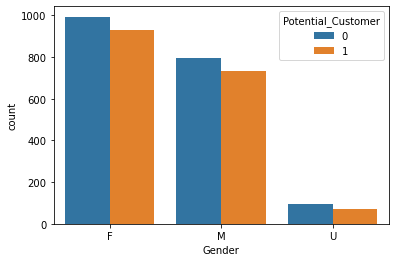

['F', 'M', 'U']
Categories (3, object): ['F', 'M', 'U']


Column : Cust_Prop


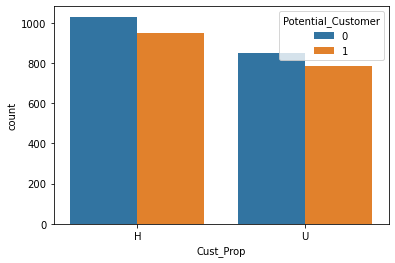

['H', 'U']
Categories (2, object): ['H', 'U']


Column : Status_Latest_Ad


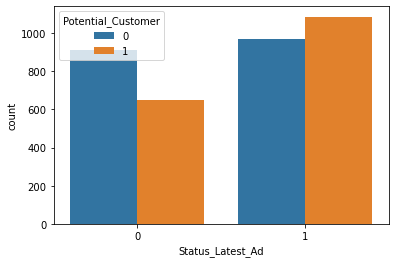

[0, 1]
Categories (2, int64): [0, 1]


Column : Status_Cust


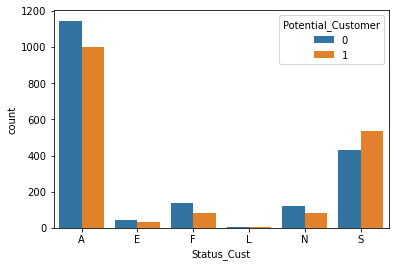

['A', 'S', 'E', 'F', 'N', 'L']
Categories (6, object): ['A', 'S', 'E', 'F', 'N', 'L']




In [319]:
for col in CatFes:
    print('Column : {}'.format(col))
    sns.countplot(x=col, data=data, hue=data.Potential_Customer)
    plt.show()
    print(data[col].unique())
    print('\n')

### 3.2.1. Insight

## 3.3 Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

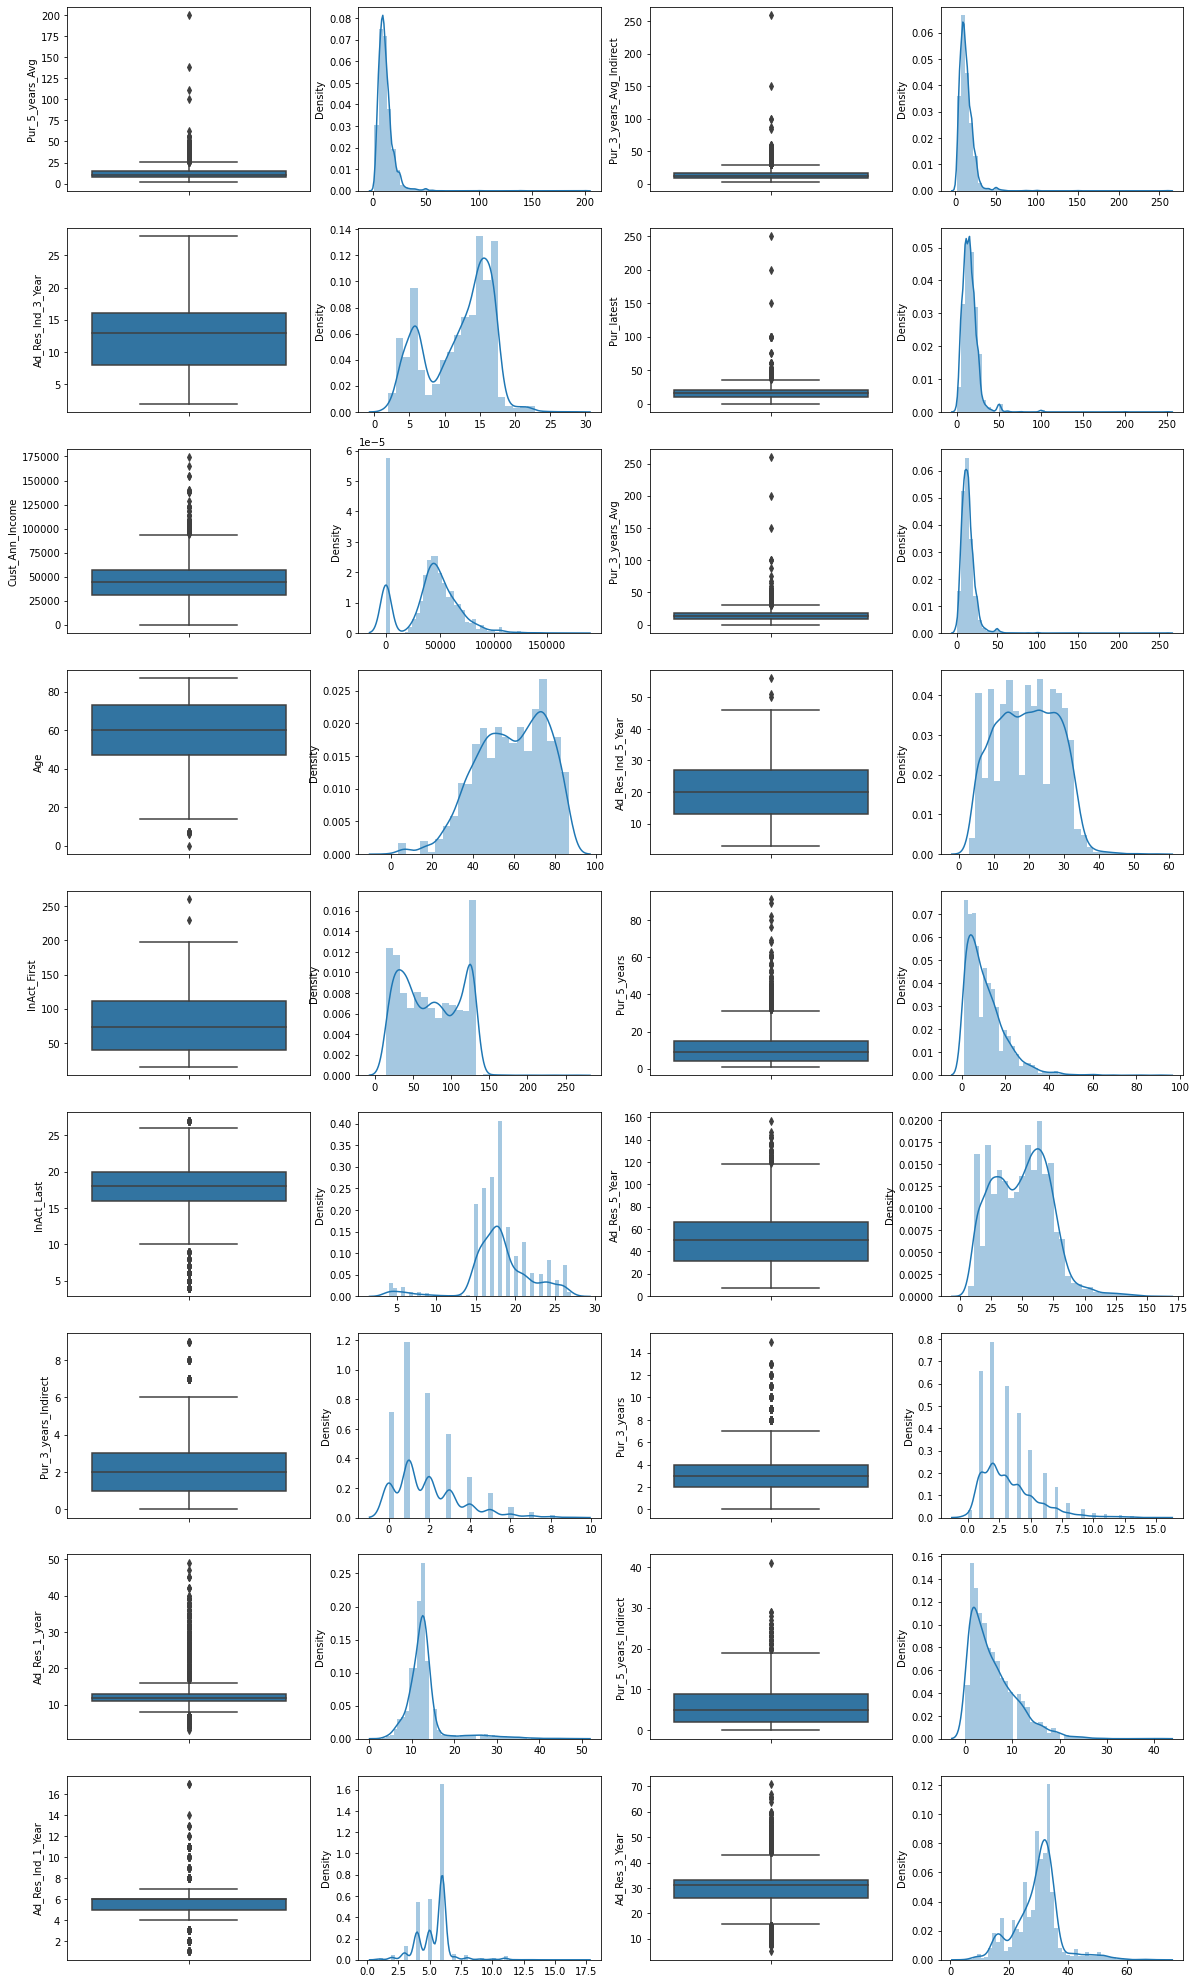

In [322]:
plt.figure(figsize=(20,40))
i = 0
for col in NumCols:
    plt.subplot(10, 4, (i+1)*2-1)
    sns.boxplot(y = data[NumCols[i]], data=data)
    plt.subplot(10, 4, (i+1)*2)
    sns.distplot(x = data[NumCols[i]],label=NumCols[i])
    i += 1


### 3.3.1 Insight

## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

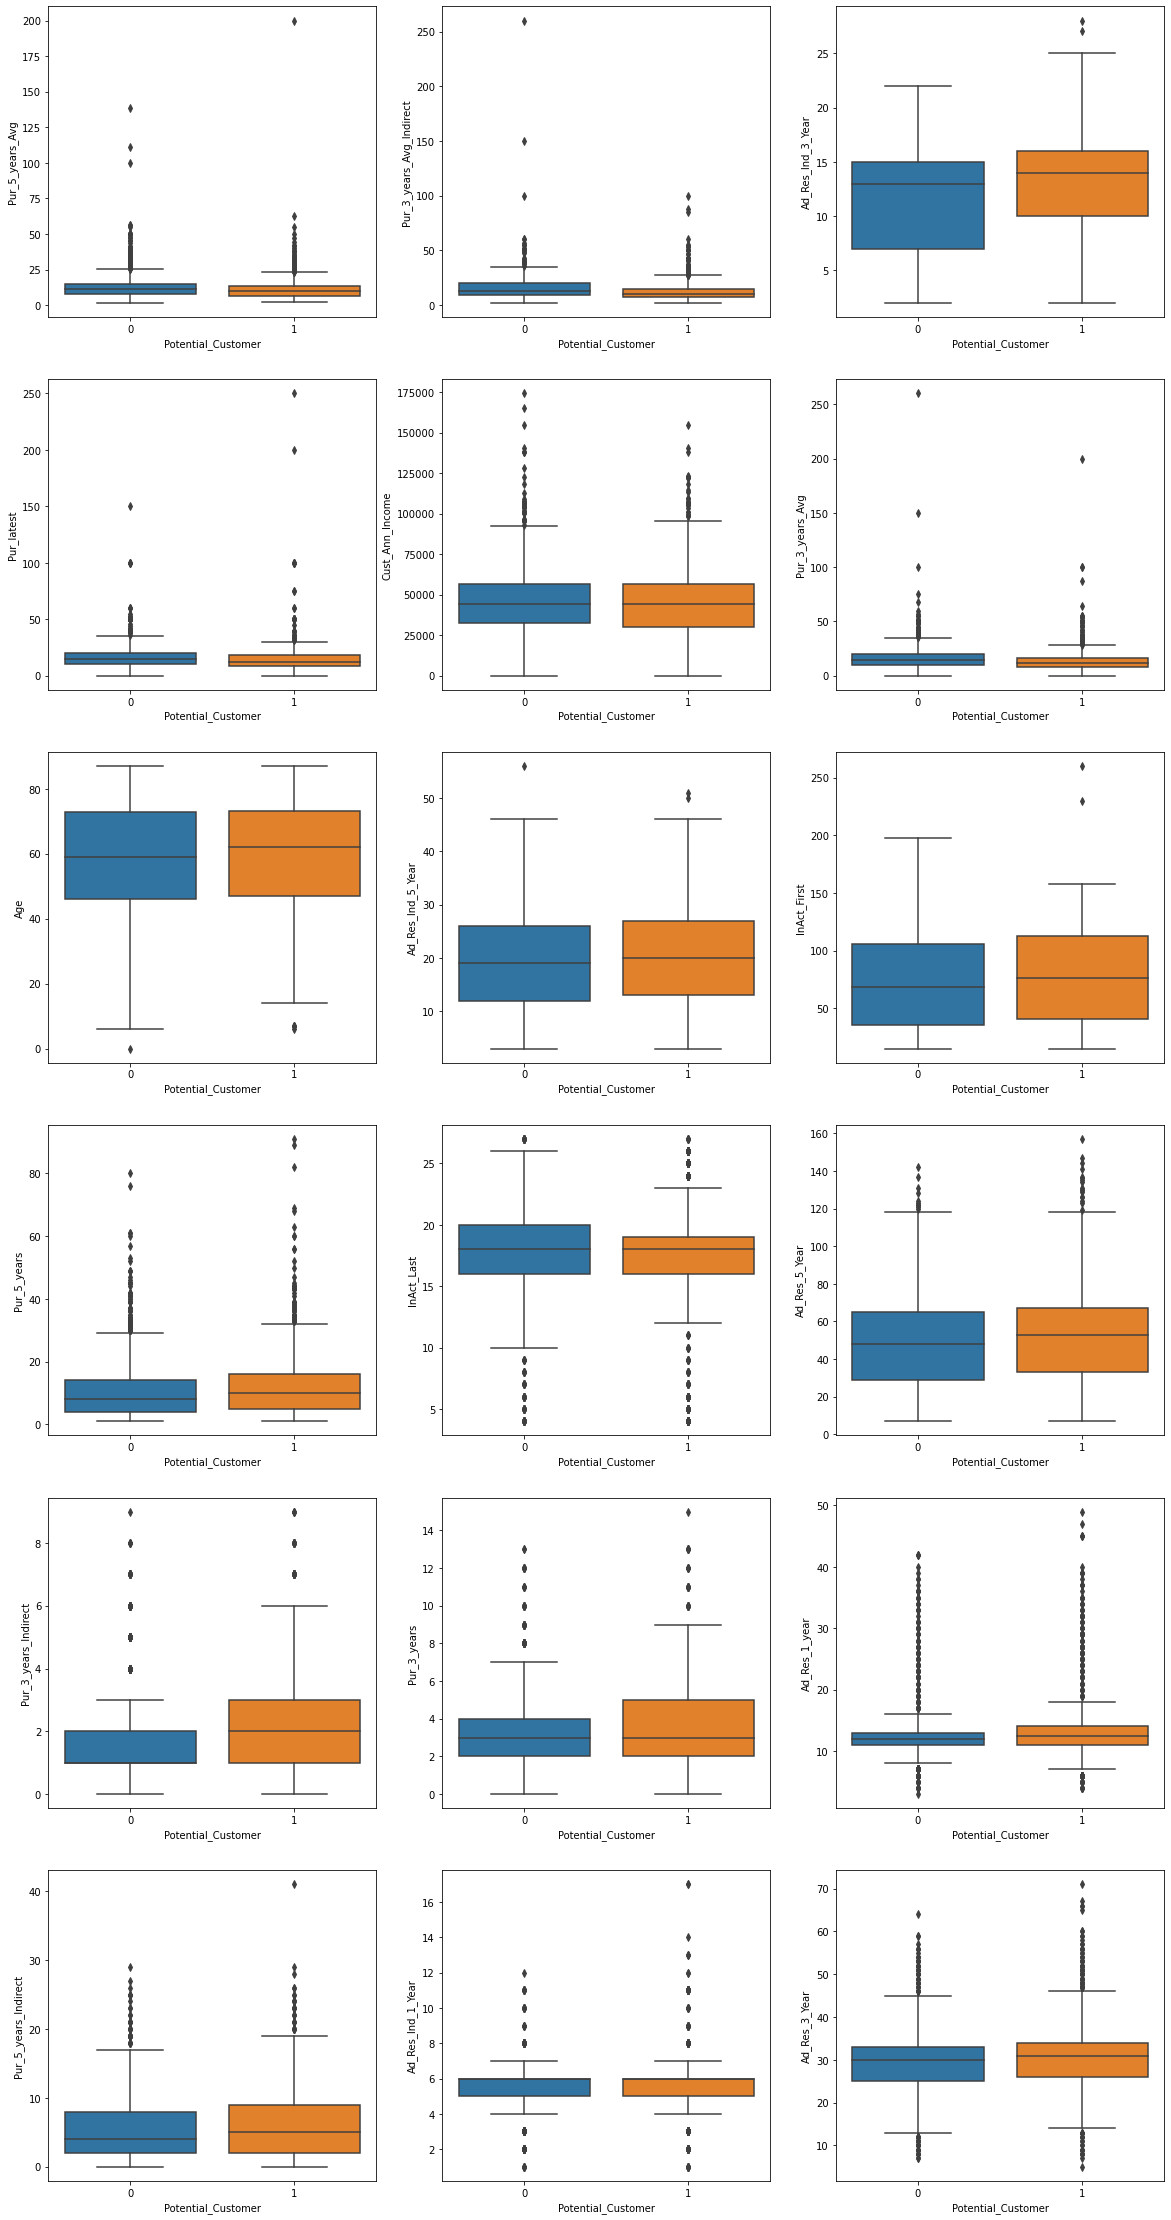

In [329]:
#maybe add a violin plot too
plt.figure(figsize=(20,40))
i = 0
for col in NumCols:
    plt.subplot(6, 3, i+1)
    sns.boxplot(y = data[NumCols[i]], x = data['Potential_Customer'],data=data)
    i += 1

## 3.5 Explore the Relationship between the columns and try to answer the following questions:

1. Is there any significant difference between men/women's salary?

2. Is there any significant difference between men/women's number of the purchase in the last three years?

3. Is there any significant difference between men/women's average purchase in the last three years?

4. Is there any significant difference between men/women's total purchase in the last three years?

5. (optional) You can explore more about the relationships between the columns, if you believe the insight will improve some dicisions in this company. For instance, sending advertisements to customers regarding gender, customer status, etc.

<AxesSubplot:xlabel='Gender', ylabel='Cust_Ann_Income'>

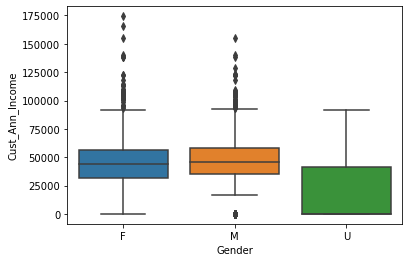

In [330]:
#1.
sns.boxplot(x = data['Gender'], y = data['Cust_Ann_Income'], data=data)

<AxesSubplot:xlabel='Gender', ylabel='Pur_3_years'>

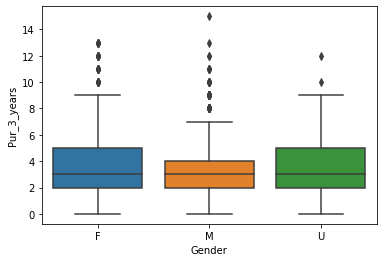

In [333]:
#2
sns.boxplot(x = data['Gender'], y = data['Pur_3_years'], data=data)

<AxesSubplot:xlabel='Gender', ylabel='Pur_3_years_Avg'>

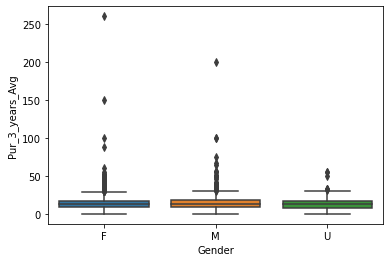

In [334]:
#3.
sns.boxplot(x = data['Gender'], y = data['Pur_3_years_Avg'], data=data)

<AxesSubplot:xlabel='Gender'>

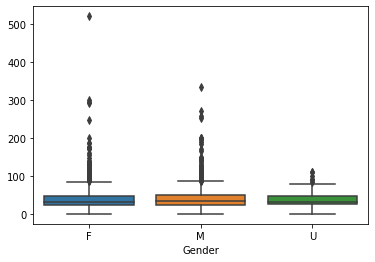

In [337]:
#4.
sns.boxplot(x = data['Gender'], y = data['Pur_3_years']*data['Pur_3_years_Avg'], data=data)

# 4. Feature Enginearing

## 4.1 Add Some High Level Features and explore their relationship with the target variable

Sometimes we can use high level features that reflect the interactions between the columns as new features to get better insight and feed more information to our predictive models. Also transformation of some columns can be better options to be fed to the models. For instance, instead of a numerical column, you can use log of the column, square of the column, or any other transformation of the column. The type of interaction, or transformation you should choose, can be defined after Exploratory data analysis or just business insight.

**Example:** Instead of two variables for the number of purchase, and the average amount of purchase, we could calculate the total amount of purchase for the customers. 

## 4.2 Check Correlation between Numerical Variables

# 5. Feature Selection

It is better we do not have numerical columns with high correlations as they confuse the machine learning algorithms. We can manually remove the highly-correlated features, or we can let the PCA handles that during the pre-processing.

# 6. Data PreProcessing

## 6.1 Check the Data for Missing Values
**Hint:**
1. Check which columns have missing values

2. Create a list of the name of the columns that have missing values
    `null_columns=data.columns[data.isnull().any()]`
   
3. Decide how you should handle the missing values for each column:

    a. For some numerical columns missing value simply means 0.
    
    b. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.
    
 **Attention:** If you decide to impute the missing values with mean/median, you need to calculate mean/median in the train set and then fill the missing values on both train and test with them. The similar rule applies for handling outliers IF you decide to replace outliers with lower/upper fence. You can calculate the UF/LF on the train set only. For this capstone, it is totally up to you to decide replacing the outliers or just using an appropriate scaling technique.

In [136]:
null_columns=data.columns[data.isnull().any()]
null_columns

Index(['Cust_Last_Purchase', 'Pur_3_years_Avg_Indirect', 'Age'], dtype='object')

In [137]:
#remove missing value

data['Pur_3_years_Avg_Indirect'].fillna(0, inplace=True)

In [138]:
null_columns=data.columns[data.isnull().any()]
null_columns

Index(['Cust_Last_Purchase', 'Age'], dtype='object')

## 6.1 Separate X (features) and y (target)

**Attention:** Don't forget to exclude the column `Cust_Last_Purchase` from your analysis
Define X and y and split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [139]:
X = data.drop(columns=['Potential_Customer'])
y = data['Potential_Customer']

In [95]:
X.head()

,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14.0,110.0,...,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,1.0,7.0,0.0,3.0,25.0,25.00,13.00,0.00,18.0,75.0,...,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19.0,57.0,...,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,1.0,11.0,0.0,3.0,20.0,20.00,12.45,0.00,5.0,113.0,...,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17.0,118.0,...,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0


In [96]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Potential_Customer, dtype: category
Categories (2, int64): [0, 1]

In [140]:
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Columns: 3645 entries, Cust_Last_Purchase to Cust_Prop_U
dtypes: float64(19), uint8(3626)
memory usage: 13.1 MB


## 3.2 Split data to train/test

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy , y, test_size=0.25, 
                                                    random_state=42, stratify=y)

## 3.3 Find and Remove/Impute the Missing Values

In [99]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_test['Age'].fillna(X_train['Age'].median(), inplace=True)

In [100]:
null_columns=data.columns[data.isnull().any()]
null_columns

Index(['Age'], dtype='object')

In [101]:
null_columns=X_train.columns[X_train.isnull().any()]
null_columns

Index([], dtype='object')

In [102]:
null_columns=X_test.columns[X_test.isnull().any()]
null_columns

Index([], dtype='object')

## 6.4 Dummy Variables
Change categorical variables with numerical variables

In [24]:
age.median


NameError: name 'age' is not defined

## 6.5 Feature Scaling

In [103]:
#StandardScaler
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

In [104]:
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler 
X_train_msc = MinMaxScaler().fit_transform(X_train)
X_test_msc = MinMaxScaler().fit_transform(X_test)

In [105]:
from sklearn.preprocessing import PowerTransformer
#PowerTransformer
power = PowerTransformer()
X_train_power = power.fit_transform(X_train)
X_test_power = power.fit_transform(X_test)

## 6.6 PCA on Numerical Columns only

1. Save the above scaled train and test data, as dataframe with proper column names
    - `X_train_sc=pd.DataFrame(X_train_sc, columns=X_train.columns)`

    - `X_train_sc.index=X_train.index`

    - `X_test_sc=pd.DataFrame(X_test_sc, columns=X_test.columns)`

    - `X_test_sc.index=X_test.index`

2. Separate train and test data for numerical columns only
    - `train_PCA=X_train_sc[NewNumCols]` 

    - `test_PCA=X_test_sc[NewNumCols]`
3. Define the number of components on `train_PCA`
4. Fit PCA on `train_PCA` 
5. Transform `train_PCA` and `test_PCA` save it as `PCA_train` and `PCA_test`, and save them as DataFrame. Use `PCA_train.index=X_train.index` to make sure `PCA_train` have the same index with `X_train` because we need to concat this data to the dummy variables. Do the same on `PCA_test`
6. Concat `PCA_train` to the dummy variables in `X_train` save it as `X_train_pca`
7. Concat `PCA_test` to the dummy variables in `X_test` save it as `X_train_pca`

In [106]:
X_train_sc=pd.DataFrame(X_train_sc, columns=X_train.columns)
X_train_sc.index=X_train.index
X_test_sc=pd.DataFrame(X_test_sc, columns=X_test.columns)
X_test_sc.index=X_test.index

In [107]:
train_PCA=X_train_sc[NumCols]
test_PCA=X_test_sc[NumCols]

In [108]:
train_PCA

,Ad_Res_1_year,Ad_Res_Ind_5_Year,Cust_Ann_Income,Pur_3_years_Avg,Pur_3_years_Avg_Indirect,Age,Pur_5_years_Indirect,Pur_3_years,InAct_First,Pur_latest,Pur_3_years_Indirect,Ad_Res_Ind_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Pur_5_years_Avg,Pur_5_years,InAct_Last,Ad_Res_3_Year
3151,3.166816,0.287620,0.526282,-0.662062,-0.383673,1.817462,0.641166,0.308927,0.034963,-0.834582,0.055135,0.631992,1.583614,1.129097,-0.789183,1.909866,-3.297645,1.824165
1698,2.768450,0.873527,-0.109796,-0.557287,-0.241189,0.295128,1.459361,0.761965,0.456067,-0.655811,1.271252,1.279334,0.536374,4.016904,-0.624971,1.165494,-2.113147,1.439770
2327,-0.020117,-0.415470,0.854192,-0.462038,-0.051210,-0.962453,-0.586127,0.761965,-0.780927,-0.477041,0.055135,0.847772,-0.554501,0.407146,-0.483532,-0.323250,-0.217951,0.286584
721,-0.020117,-1.118559,0.271392,-1.122119,-0.763630,-1.227206,-0.586127,1.215002,-1.149393,-0.923968,0.663194,-0.015350,-1.121756,0.407146,-1.134389,-0.429589,-0.217951,-0.482206
811,-0.020117,1.225072,0.224565,-0.297255,0.091273,0.824635,0.641166,-0.144110,1.482508,-0.477041,0.055135,0.416211,0.841819,0.407146,-0.291751,0.421122,0.018948,0.158453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,-0.219300,1.576617,1.791638,-0.029603,0.202411,-0.830076,4.323045,1.668040,1.350913,-0.030114,2.487368,0.847772,1.409074,-0.314806,-0.267778,3.611288,-0.454851,0.286584
2424,-0.219300,-0.532651,-1.637542,-0.233438,0.376241,0.030374,-0.790676,-0.597148,-0.544055,-0.030114,-0.552923,0.416211,-0.467231,0.407146,-0.363669,-0.748605,-0.217951,0.158453
2788,0.179067,1.225072,0.814282,-0.392505,-1.048597,1.354143,1.050264,-0.144110,1.350913,-0.387655,-1.160981,-1.525815,1.103629,-0.314806,-0.797574,1.059155,-0.454851,0.286584
1813,-0.020117,-0.181107,0.395320,-0.209625,0.233757,1.354143,-0.790676,0.308927,-0.570374,-0.030114,0.055135,1.063553,-0.292691,0.407146,0.041469,-0.323250,0.966547,0.542848


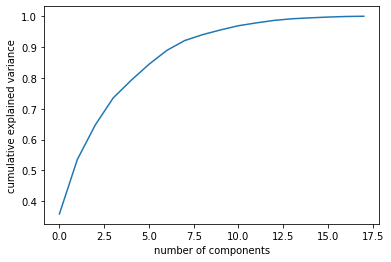

In [109]:
from sklearn.decomposition import PCA
pca = PCA().fit(train_PCA)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [110]:
pca = PCA(10).fit(train_PCA)
PCA_train = pca.transform(train_PCA)
PCA_test = pca.transform(test_PCA)

In [111]:
PCA_train=pd.DataFrame(X_train_sc, columns=X_train.columns)
X_train_sc.index=X_train.index
X_test_sc=pd.DataFrame(X_test_sc, columns=X_test.columns)
X_test_sc.index=X_test.index



# 7. Objective 1: Machine Learning
    
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.


Apply various ML algorithms on the data, evaluate them after Grid Search and Cross Validation, and choose the best model.

KNN

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {'n_neighbors': np.arange(1, 20),
              'p': [1,2],
              'weights': ['uniform','distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), 
                    knn_param_grid, scoring='roc_auc',
                    cv=5, return_train_score=True)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='roc_auc')

In [37]:
#add test accuracy later
print('Knn best parameters', knn_grid.best_params_)
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train, y_train)
print('Knn best score on train set= ',knn_grid.best_score_ )
print('Knn best score on test set= ', knn_model.score(X_test, y_test))


knn_pred = knn_model.predict(X_test)
knn_confusion = confusion_matrix(y_test, knn_pred)
print('Knn best model confusion matrix on test data  \n',knn_confusion  )
print('\n**************************************\n')
print('Classification report for KNN best model\n\n\n',
      classification_report(y_test, knn_pred)) 

Knn best parameters {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Knn best score on train set=  0.5100781243727652
Knn best score on test set=  0.5060773480662983
Knn best model confusion matrix on test data  
 [[245 226]
 [221 213]]

**************************************

Classification report for KNN best model


               precision    recall  f1-score   support

           0       0.53      0.52      0.52       471
           1       0.49      0.49      0.49       434

    accuracy                           0.51       905
   macro avg       0.51      0.51      0.51       905
weighted avg       0.51      0.51      0.51       905



In [113]:
#for scaled data
#from sklearn.pipeline import Pipeline
#knnpipe = Pipeline([('scale', StandardScaler()),
#                   ('KNN',KNeighborsClassifier())])

#knn_grid_sc = GridSearchCV(knnpipe,knn_param_grid,cv=5,return_train_score=True)
#knn_grid_sc.fit(X_train,y_train)

#knn_model_sc = knn_grid_sc.best_estimator_
#knn_model_sc.fit(X_train,y_train)
#print('KNN best score on scaled set= ',knn_grid_sc.best_score_ )

#knn_pred_sc = knn_model_sc.predict(X_test_sc)
#knn_confusion_sc = confusion_matrix(y_test, knn_pred_sc)
#print('Knn best model confusion matrix on scaled data  \n',knn_confusion_sc  )
#print('\n**************************************\n')
#print('Classification report for Knn best model\n\n\n',
#      classification_report(y_test, knn_pred_sc)) 

Decision Tree

In [39]:
tree_param_grid = {'max_depth': np.arange(1, 10)}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        tree_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, scoring='roc_auc')

In [43]:
print('Decision Tree best parameters', tree_grid.best_params_)
tree_model = tree_grid.best_estimator_
tree_model.fit(X_train, y_train)
print('Decision Tree best score on train set= ',tree_grid.best_score_ )
print('Decision Tree best score on test set= ', tree_model.score(X_test, y_test))

tree_pred = tree_model.predict(X_test)
tree_confusion = confusion_matrix(y_test, tree_pred)
print('Decision Tree best model confusion matrix on test data  \n',tree_confusion )
print('\n**************************************\n')
print('Classification report for Decision Tree best model\n\n\n',
      classification_report(y_test, tree_pred)) 

Decision Tree best parameters {'max_depth': 5}
Decision Tree best score on train set=  0.579826261450005
Decision Tree best score on test set=  0.5657458563535912
Decision Tree best model confusion matrix on test data  
 [[297 174]
 [219 215]]

**************************************

Classification report for Decision Tree best model


               precision    recall  f1-score   support

           0       0.58      0.63      0.60       471
           1       0.55      0.50      0.52       434

    accuracy                           0.57       905
   macro avg       0.56      0.56      0.56       905
weighted avg       0.56      0.57      0.56       905



In [41]:
#for scaled data
tree_model.fit(X_train_sc, y_train)
print('Decision Tree best score on train set= ',tree_grid.best_score_ )

tree_pred = tree_model.predict(X_test_sc)
tree_confusion = confusion_matrix(y_test, tree_pred)
print('Decision Tree best model confusion matrix on scaled data  \n',tree_confusion  )
print('\n**************************************\n')
print('Classification report for Decision Tree best model\n\n\n',
      classification_report(y_test, tree_pred)) 

Decision Tree best score on train set=  0.579826261450005
Decision Tree best model confusion matrix on scaled data  
 [[295 176]
 [220 214]]

**************************************

Classification report for Decision Tree best model


               precision    recall  f1-score   support

           0       0.57      0.63      0.60       471
           1       0.55      0.49      0.52       434

    accuracy                           0.56       905
   macro avg       0.56      0.56      0.56       905
weighted avg       0.56      0.56      0.56       905



Logistic Regression

In [44]:
logr_param_grid = {'C': [0.0001,0.001,0.01, 0.1, 1, 10, 100, 1000],
                   'penalty' : ['l1', 'l2'],
                   'fit_intercept': [True, False]}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                        logr_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
logr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc')

In [45]:
print('Logistic Regression best parameters', logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
logr_model.fit(X_train, y_train)
print('Logistic Regression best score on train set= ',logr_grid.best_score_ )
print('Logistic Regression best score on test set= ', logr_model.score(X_test, y_test))

logr_pred = logr_model.predict(X_test)
logr_confusion = confusion_matrix(y_test, logr_pred)
print('Logistic Regression best model confusion matrix on test data  \n',logr_confusion  )
print('\n**************************************\n')
print('Classification report for Logistic Regression best model\n\n\n',
      classification_report(y_test, logr_pred)) 

Logistic Regression best parameters {'C': 0.001, 'fit_intercept': True, 'penalty': 'l2'}
Logistic Regression best score on train set=  0.5948976521527717
Logistic Regression best score on test set=  0.5701657458563536
Logistic Regression best model confusion matrix on test data  
 [[304 167]
 [222 212]]

**************************************

Classification report for Logistic Regression best model


               precision    recall  f1-score   support

           0       0.58      0.65      0.61       471
           1       0.56      0.49      0.52       434

    accuracy                           0.57       905
   macro avg       0.57      0.57      0.57       905
weighted avg       0.57      0.57      0.57       905



In [46]:
#for scaled data
logr_model.fit(X_train_sc, y_train)
print('Logistic Regression best score on scaled set= ',logr_grid.best_score_ )

logr_pred = logr_model.predict(X_test_sc)
logr_confusion = confusion_matrix(y_test, logr_pred)
print('Logistic Regression best model confusion matrix on scaled data  \n',logr_confusion  )
print('\n**************************************\n')
print('Classification report for Logistic Regression best model\n\n\n',
      classification_report(y_test, logr_pred)) 

Logistic Regression best score on scaled set=  0.5948976521527717
Logistic Regression best model confusion matrix on scaled data  
 [[277 194]
 [214 220]]

**************************************

Classification report for Logistic Regression best model


               precision    recall  f1-score   support

           0       0.56      0.59      0.58       471
           1       0.53      0.51      0.52       434

    accuracy                           0.55       905
   macro avg       0.55      0.55      0.55       905
weighted avg       0.55      0.55      0.55       905



SVM

In [ ]:
#svc_param_grid = {'C': [0.1, 1, 10, 100],
#                  'kernel' : ['linear', 'rbf'],
#                  'gamma': [0.1, 1, 10, 100]}

#svc_grid = GridSearchCV(SVC(), 
#                        svc_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True, n_jobs=5)
#svc_grid.fit(X_train, y_train)

In [34]:
#repeat this with scaled data
from sklearn.svm import LinearSVC

svclinear_param_grid = {'C':np.arange(0.01,100,10),
                  'penalty': ['l1', 'l2']}

svclinear_grid = GridSearchCV(LinearSVC(), 
                        svclinear_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True, n_jobs=5)
svclinear_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=5,
             param_grid={'C': array([1.000e-02, 1.001e+01, 2.001e+01, 3.001e+01, 4.001e+01, 5.001e+01,
       6.001e+01, 7.001e+01, 8.001e+01, 9.001e+01]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc')

In [53]:
print('Linear SVM best parameters', svclinear_grid.best_params_)
svclinear_model = svclinear_grid.best_estimator_
svclinear_model.fit(X_train, y_train)
print('Linear SVM best score on train set= ',svclinear_grid.best_score_ )
print('Linear SVM best score on test set= ', svclinear_model.score(X_test, y_test))

svclinear_pred = svclinear_model.predict(X_test)
svclinear_confusion = confusion_matrix(y_test, svclinear_pred)
print('Linear SVM best model confusion matrix on test data  \n',svclinear_confusion  )
print('\n**************************************\n')
print('Classification report for Linear SVM best model\n\n\n',
      classification_report(y_test, svclinear_pred)) 

Linear SVM best parameters {'C': 10.01, 'penalty': 'l2'}
Linear SVM best score on train set=  0.5335010501335175
Linear SVM best score on test set=  0.5259668508287293
Linear SVM best model confusion matrix on test data  
 [[362 109]
 [320 114]]

**************************************

Classification report for Linear SVM best model


               precision    recall  f1-score   support

           0       0.53      0.77      0.63       471
           1       0.51      0.26      0.35       434

    accuracy                           0.53       905
   macro avg       0.52      0.52      0.49       905
weighted avg       0.52      0.53      0.49       905



In [56]:
#for scaled data
svclinear_model.fit(X_train_sc, y_train)
print('Decision Tree best score on train set= ',svclinear_grid.best_score_ )

svclinear_pred = svclinear_model.predict(X_test_sc)
svclinear_confusion = confusion_matrix(y_test, svclinear_pred)
print('Decision Tree best model confusion matrix on scaled data  \n',svclinear_confusion  )
print('\n**************************************\n')
print('Classification report for Decision Tree best model\n\n\n',
      classification_report(y_test, svclinear_pred)) 

Decision Tree best score on train set=  0.5335010501335175
Decision Tree best model confusion matrix on scaled data  
 [[298 173]
 [222 212]]

**************************************

Classification report for Decision Tree best model


               precision    recall  f1-score   support

           0       0.57      0.63      0.60       471
           1       0.55      0.49      0.52       434

    accuracy                           0.56       905
   macro avg       0.56      0.56      0.56       905
weighted avg       0.56      0.56      0.56       905



In [63]:
from sklearn.pipeline import Pipeline
SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC())])

svcl_param_grid_sc = {'SVC__C':np.arange(0.01,100,10)}
svcl_grid_sc = GridSearchCV(SVCpipe,svcl_param_grid_sc,cv=5,return_train_score=True)
svcl_grid_sc.fit(X_train,y_train)

svclinear_model_sc = svcl_grid_sc.best_estimator_
svclinear_model_sc.fit(X_train,y_train)
print('Linear SVM best score on train set= ',svcl_grid_sc.best_score_ )

svclinear_pred_sc = svclinear_model_sc.predict(X_test_sc)
svclinear_confusion_sc = confusion_matrix(y_test, svclinear_pred_sc)
print('Linear SVC best model confusion matrix on scaled data  \n',svclinear_confusion_sc  )
print('\n**************************************\n')
print('Classification report for Linear SVC best model\n\n\n',
      classification_report(y_test, svclinear_pred_sc)) 

Linear SVM best score on train set=  0.5727970207878874
Linear SVC best model confusion matrix on scaled data  
 [[225 246]
 [161 273]]

**************************************

Classification report for Linear SVC best model


               precision    recall  f1-score   support

           0       0.58      0.48      0.53       471
           1       0.53      0.63      0.57       434

    accuracy                           0.55       905
   macro avg       0.55      0.55      0.55       905
weighted avg       0.56      0.55      0.55       905



# 8. Objective 2

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume among the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

In [ ]:
#Objective: Calculate the value and the revenue of your model. 
#Fit your model on train set. 
#Assume among the customers on your test set we only send advertisement to those your model predicted as Class1 
#and we ignore the rest. - use confusion matric
#From the data you can calculate the average Cust_Last_Purchase for those who are in the train set 
#and had the last purchase (Cust_Last_Purchase>0) . 
#Assume sending advertisement to each customer costs 5$ 
#and the average purchase you calculated on the train set remains the same for the test set. 
#Calculate the value of your models to choose the best model.

In [155]:
confusion = [knn_confusion, tree_confusion, logr_confusion, svclinear_confusion, svclinear_confusion_sc]
confusion_name = ['KNN', 'Decision tree','Logistic Regression','SVM','SVM (scaled)']
ad_cost= 5
avg_pur=data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()

for i in range(0,5):
    cost = ad_cost*(confusion[i][0,0] + confusion[i][1,0])
    lost = avg_pur*confusion[i][0,1]
    gain = avg_pur*confusion[i][0,0]
    value= gain - lost - cost
    revenue = gain - cost
    print(confusion_name[i])
    print('Value: $',value)
    print('Revenue: $',revenue)
    print('------------------------------------------')


KNN
Value: $ -1864.470238095238
Revenue: $ 1368.321620583717
------------------------------------------
Decision tree
Value: $ -772.5754608294933
Revenue: $ 1784.2690092165894
------------------------------------------
Logistic Regression
Value: $ -1235.3557987711215
Revenue: $ 1615.3788402457753
------------------------------------------
SVM
Value: $ -763.1864439324122
Revenue: $ 1778.96351766513
------------------------------------------
SVM (scaled)
Value: $ -2238.5846774193546
Revenue: $ 1376.2644009216588
------------------------------------------


# 9. Objective 3
    
**3. Compare your best models' revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost



In [157]:
#cf best model revenue with revenue of X_test
cost_def = ad_cost*X_test.shape[0]
gain_def = data[(data.index.isin(X_test.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].sum()
revenue_def = gain_def - cost_def

print('Default solution: Sending advertisement to all the customers in X_test \nRevenue = $', revenue_def)

Default solution: Sending advertisement to all the customers in X_test 
Revenue = $ 1615.0


# 10. Objective 4
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10\%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

In [162]:
#model revenue on 30000 custs

confusion_name = ['KNN', 'Decision tree','Logistic Regression','Linear SVM','Linear SVM (scaled)']
y_pred = [knn_pred, tree_pred, logr_pred, svclinear_pred, svclinear_pred_sc]
ad_cost= 5
avg_pur=data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()
potential_cust = 30000*0.1

for i in range(0,5):
    prec = precision_score(y_test, y_pred[i])
    recall = recall_score(y_test, y_pred[i])
    acc = accuracy_score(y_test, y_pred[i])
    
    tp_new = prec*potential_cust
    fn_new = potential_cust - tp_new
    fp_new = (tp_new/prec) - tp_new
    tn_new = 30000 - tp_new - fn_new - fp_new

    cost = ad_cost*(tp_new + fp_new)
    lost = avg_pur*fn_new
    gain = avg_pur*tp_new
    value= gain - lost - cost
    revenue = gain - cost
    print(confusion_name[i])
    print('Value: $',value)
    print('Revenue: $',revenue)
    print('------------------------------------------')

KNN
Value: $ -14900.037357492925
Revenue: $ 7091.743994064596
------------------------------------------
Decision tree
Value: $ -10353.6644237262
Revenue: $ 9364.930460947959
------------------------------------------
Logistic Regression
Value: $ -12231.469422738704
Revenue: $ 8426.027961441705
------------------------------------------
Linear SVM
Value: $ -10534.396133820097
Revenue: $ 9274.56460590101
------------------------------------------
Linear SVM (scaled)
Value: $ -12706.637409765317
Revenue: $ 8188.4439679284005
------------------------------------------


In [165]:
#revenue of default model
cost_def = ad_cost*30000
lost_def = avg_pur*0.1
revenue_def = gain - cost
print('Default solution: Sending advertisement to all the customers \nRevenue = $', revenue_def)

Default solution: Sending advertisement to all the customers 
Revenue = $ 8188.4439679284005
